# Machine Learning Applications in Cancer Research

## 1. Introduction and Motivations

Cancer is a devasting disease that has impacted the lives of many people. It is estimated that 50% of all Canadians will be diagnoised with Cancer in their lifetime, and 25% will die from the disease<sup>[[1]](#canada_cancer_statistics)</sup>. Research in the field is paramount in order to save lives. Interestingly, Machine Learning has become a key area in cancer research, specifically, in cancer susceptibility perdiction, recurrence prediction, and survival prediction<sup>[[2]](#machinelearning_cancer)</sup>. The goal of this project is to explore Machine Learning fundementals and it will be divided into two parts.

The first part of this project will involve applying several Machine Learning techniques to a Breast Cancer dataset. Machine lEanrign mdoels will be made that can perdict if the tumour cellular sample is benign or malignant. This is important since it can automate part of the diagnosis procedure, thus saving lives. 
 
The second part we will conduct survival anaylsis on cancer patients. 



### 1.1 Import Libraries

Import libraries that we will be using throughout this project.

In [2]:
# Import scikit learn (version 0.24.2)
from sklearn import datasets
# Import pandas (version 0.24.2)
import pandas as pd
# Import matplotlib (version 3.0.3)
import matplotlib.pyplot as plt
# Import matplotlib (version 1.19.2)
import numpy as np

## 2.0 Breast Cancer perdiction using Machine Learning

This section will be divided into two parts. The first part will be importing, exploring the dataset and perparing the dataset for analysis. The second part will be apply Machine Learning techniques to he datset. 

### 2.1 Data Exploration and Preperation

Here we will perform data exploration in order to understand some aspects of the dataset. This will be done mainly through visual exploration. At the end of this section, we will also perform data cleaning in order to perpare the data for analysis. 

#### 2.1.1 Importing the Data set

We will be using the [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Conveniently, the dataset is built into the scikit-learn library and can be imported from there. 

In [3]:
# Load the Breast Cancer data set
data = datasets.load_breast_cancer()

# Convert loaded data into Pandas Dataframe with feature columns
df = pd.DataFrame(data=data.data, columns=data.feature_names)

# Add target data to Dataframe
df['Diagnosis'] = data.target

# Show Dataframe
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### 2.1.2 Terminology and Notation

There is a lot of jargon when dealing with Machine Learning, so I will explain the terms used in this project so that we are all on the same page. The column "Daignosis" is refered to as the _label_ or _output_ of the dataset, and is denoted $y$. Then the matrix that is the rest of the data can be refered to as $X$. Each column name of the matrix $X$ is called a feature while the rows are called an training example. Let $n$ denote the number of training examples and $d$ as the number features. 

#### 2.1.3 Column Names

Next we would like to view all the column names of the dataset. 

In [4]:
# print column names for inspection
print(df.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Diagnosis'],
      dtype='object')


#### 2.1.4 Column Description

Before we move on, it would be wise to attempt to describe the columns of the dataset. Initially, [Fine Needle Asipration](https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html) is used to collect small tissue/fluid samples from  suspected tumour areas of the breast. A small subsample of the aspiration is then digitized for image analysis. 596 images were perpared and used for anlysis. 

Most cells nucleus in the human body are usually uniform spheroid, whereas tumour cell nucleus tend to have abnormal geometries, as shown in Figure 1<sup>[[3]](#cancercellimage)</sup>. Certain features of these shape irregularitites may help in differentiating between begnin and maligmant tumour cells, thus cell nucleus feature extraction becomes important.
<img src="Images/1280px-Normal_and_cancer_cells_structure.jpg" width=500 height=400 />
<center>Figure 1: Breast tumour cells have irregularities in their shape due to having mulitple nucleus and nucleoulus, in comparison to healthy breast cells. </center>


The first step of nuclear feature extraction is to identify cell nuclei boundraries in each sample image. The researchers used a computer vision framework known as [Active contour model](https://en.wikipedia.org/wiki/Active_contour_model), also known as "snakes", in order to find the boundaraies of identifable cell nuclie in each sample image. Each snake is a series of points that fit to the cell boundaries. Please refer to Figure 2<sup>[[4]](#columndescription)</sup> for an example. The process of how these snakes are fitted is not important in  our use, but the snakes themselves are very important since they will be used to extract geometric features of the cell nuclei.
<img src="Images/snake.jpg" width=500 height=400 />
<center>Figure 2: An example of snake used to find the boundaries of cell nuclei. Please note, this instance of the snake is an initialization created by a specialist. Their algorithm is then ran which causes the snake to converge onto the boundaries of the cell nucleus. </center>


Once the snakes have converged onto the boundaries of the cell nuclei, cell nucleus shape feautes can be determined using those snakes. The features are the following.
<ol>
<li> <b>Radius</b>
To find the Radius of a cell nucleus, the centroid of the snake is first found. Then the Radius is measured by averaging distance between the centroid and each individual snake.
    </li>

<li> <b>Perimiter</b>
As mentioned before, the snake is defined by a set of n points $v_{n}$ where $i=\{0,1,2,...,n-1\}$. Thus, the nucleus perimiter can be determined as follows. First define the distance between two snake points $v_{i}$ and $v_{j}$ as $dist\{v_{i}, v_{j}\}$. Then the perimeter can be calculated as $(\sum\limits_{i=0}^{n-2}dist\{v_{i}, v_{i+1}\}) + dist\{v_{n-1}, v_{0}\}$.
</li>

<li><b>Area</b>
The area of the cell nucleus is computed by count the number of pixels in the interior of the snake, and adding $1/2$ the number of pixels on the perimeter.
</li>

<li><b>Compactness</b> <br>
Compactness of the cell nucleus can be computed as $\dfrac{perimeter^{2}}{area}$
</li>

<li> <b>Smoothness</b> 
The smoothness of the cell nucleus contour is computed by taking the difference from a radial line and the mean of the radial lines nearest to it, as shown in figure 3<sup>[[4]](#columndescription)</sup>. 
<img src="Images/smoothness.jpg" width=500 height=400 />
<center>Figure 3: Radial Lines used to quantify smoothness </center>
</li>

<li><b>Concavity</b> 
Chords are drawn between non-adjacent snake points and the extent to which the boundary of the nucleus is inside each chord is measured to give the concavity of a nucleus, as shown in figure 4<sup>[[4]](#columndescription)</sup>. How this is measure is not specified. Perhapes, the number of snake points within the chords is counted? 
<img src="Images/concavity.jpg" width=500 height=400 />
<center>Figure 4: Chords used to find concavity. </center>
</li>

<li> <b>Concave Points</b>
Similar to concavity, chords are drawn between non-adjacent snake points. The number of chords that have snake points inside that them is counted. For example, the concave points of the cell nucleus in Figure 4 is one, i.e there is only one chord that has snake points inside it.
</li>

<li> <b>Symmetry</b>
First, the major axis of the cell nucleus is found. The major axis is the longest chord drawn through the center of the cell nucleus. Then lines perendicular to the major axis and have endpoints at the boundary are produced, as shown in Figure 5. The differences in legnth of these line segments are used to quantify the symmtry of the nucleus. 
<img src="Images/symmetry.jpg" width=500 height=400 />
<center>Figure 5: Line segments used to quantify the symmetry of a cell nucleus. </center>
</li>

<li> <b>Fractal Demension</b> <br>
Another feature that can help in differentiating between maligment and begnin tumors is the concept of [dimension](https://en.wikipedia.org/wiki/Dimension). How we choose to define dimension is important. Suppose we use [Hamel Dimension](https://en.wikipedia.org/wiki/Dimension_(vector_space)). The cell nucleus contour as defined by a snake is a closed [curve](https://en.wikipedia.org/wiki/Curve). The Hamel Dismension of any curve is 1, that is, it would yield 1 for all nucleaus contours and therefore it would not be a useful as a feature. In our case, [fractal dimension](https://en.wikipedia.org/wiki/Fractal_dimension) will be more useful. The fractal dimension can be defined as the ratio of the change in detail to the change in scale of an object, therefore it is an index of complexity of an object. This can be best illistrated using an example. Refering to Figure 6, let us determine the fractal dimension of a line. First we define a "ruler" as a measuring device. We will the ruler to measure the length of the line in figure 6<sup>[[6]](#fractal)</sup>. 
<img src="Images/line.jpg" width=100 height=10 />
<center>Figure 6: Different number of rulers used to measure the length of a line. N refers to the number of rulers being used. </center> <br>
For $i=1$, the number of rulers we need to use to measure the length of the line is 1. For $i=2$, the size of the ruler is half that of the ruler used in $i=1$, thus you need $2$ rulers to measure the length of the line. For $i=3$, the size of the ruler is $\frac{1}{3}$ that of the ruler used in $i=1$, thus you need $3$ rulers to measure the length of the line, and so on.   Define the number of rulers as N and the scale of rulers as $\epsilon$. We can plot the results. 
</li>
</ol>

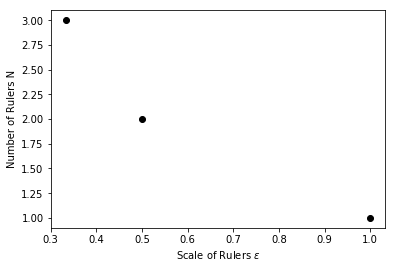

In [15]:
# Number of rulers used to measure object
N = np.array([1, 2, 3])
# Scale of rulers used to measure object
eps = np.array([1, 1/2, 1/3])

# Plot graph
plt.plot(eps, N, 'o', color='black')
plt.xlabel(r'Scale of Rulers $\epsilon$')
plt.ylabel("Number of Rulers N")
plt.show()

<ol>
Estimating the fractal dimension from the plot above can be difficult. However, we can approximate the detail of line by taking the logarithm of the number of rulers N, and the we can approximate the scale by taking the logarithm of scale of the rulers $\epsilon$. Thus, the fractal dimension can therefore be estimated by find the slope of the [regression line](https://en.wikipedia.org/wiki/Linear_regression) of the [log-log plot](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot). 
    </ol>

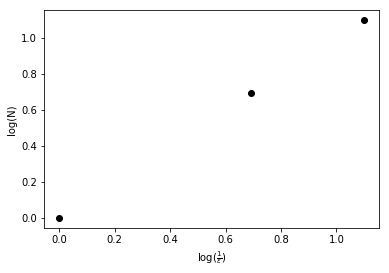

In [40]:
# log of number of rulers
logN= np.log(N)
# Log of scale of rulers
invEps = 1/eps
logInvEps= np.log(invEps)

# Plot graph
plt.plot(logInvEps, logN, 'o', color='black')
plt.xlabel(r'log$(\frac{1}{\epsilon})$')
plt.ylabel("log(N)")
plt.show()

<ol start="10">
We can thus estimate the fractal dimension as the slope of the log-log plot above. The slope of the line from the log-log plot 1, and thus an estimate of the fractal dimension of a line is 1.

The researchers used a similar methode as the above to estimate the fractal dimensions of the cell nuclei. Different sizes of rulers were used to determine different perimeters of the cell nucleus as shown in Figure 7<sup>[[4]](#columndescription)</sup>. The logarithm of both the ruler size and perimeter measured we computed. The slope of the regression line from the log-log plot was used to estimate the fractal dimension of a given cell nucleus. 
<img src="Images/fractal.jpg" width=500 height=400 />
<center>Figure 7: Different number of rulers used to measure the perimeter of a cell nucleus. Smaller rulers give more accurate measurements while larger rulers give less accurate measurments of cell nucleus perimeter. </center> <br>
<li> <b>Texture</b> <br>
The variance grey-scaled intenseties of the image pixels are used to find the texture. <br> <br>
</li>

</ol>

For each cell nuclear feature listed above, the mean, standard error, and worst value are computed for each image.  

#### 2.1.4 Dataset Description

Now that we have described the data columns, we now want to describe the observations of the dataset and to convey the most amount of information about the dataset. The best way to do this is through [summary statistics](https://en.wikipedia.org/wiki/Summary_statistics). 

In [7]:
# In python, alot of summary statistics about a dataset can be derived using describe()
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


We would also want to know the data type for each column. Specifically, we want to determine if each column is of type numeric or categorical. From the above, we can guess that all the columns are of type numeric but we should still check to be sure.

In [8]:
# Display data types for each column
print(df.dtypes)

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

#### 2.1.4 Data Cleaning

Prior to conducting any analysis, data cleaning should be performed. Data cleaning involves detecting and fixing or removing problems with the dataset. These problems can include incorrectly formmated data, missing data, or duplicated data. If these problems are not corrected, they can cause issues when performing analysis on the datasets. 

Firstly, let us see of there are problems with the column names of the dataset. 

In [3]:
# print column names for inspection
print(df.columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Diagnosis'],
      dtype='object')


There are no errors observed in the column names from the above printed results.

Next we turn our attention to missing values. There are different ways missing data can be present in our dataset. Some missing data are label as _NA_ which can be recongnized by python. 

In [4]:
# Determine if each feature as any NA values
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
Diagnosis                  0
dtype: int64


There appears to be no _NA_ missing values in our dataset. 

Our dataset might still have problems and further inquiry is still needed. Two other problems are the following. 
* A given column has empty values, which are just missing vlues that are not label as _NA_.
* A given column has incorrectly formatted data. For example, a string is present a column that should have only numeric type data. This case usually requires further inquiry once detected. In one instance, the string value might be a numeric value repersented as a string. In such a case, it should just be converted to numeric type. In all other cases (for example, the string "cat", is present in a numeric type column), the values incorrectly formatted data should be treated as a missing value.

We attempt to detect such values in the following code.

In [10]:
# Determine if a column has any incorrectly formatted data
#print(df.apply(lambda col: isinstance(df[col], df.col.dtype).all, axis=1))
type(df["mean radius"]) 

pandas.core.series.Series

## References

1. <a id='canada_cancer_statistics'></a> https://www.canada.ca/en/public-health/services/chronic-diseases/cancer/canadian-cancer-statistics.html

2. <a id='machinelearning_cancer'></a>Machine learning applications in cancer prognosis and prediction
Konstantina Kourou a, Themis P. Exarchos a,b, Konstantinos P. Exarchos a,
Michalis V. Karamouzis c, Dimitrios I. Fotiadis

3. <a id='cancercellimage'>https://en.wikipedia.org/wiki/Cancer_cell

4. <a id='columndescription'> Nuclear Feature Extraction For Breast Tumor Diagnosis W. Nick Street y William H. Wolberg z O. L. Mangasarian x December 28, 1992
    
5. Mike Gilbert's lectures

6. <a id='fractal'>https://en.wikipedia.org/wiki/Fractal_dimension

Temporary links:

http://fractalfoundation.org/OFC/OFC-10-4.html
https://en.wikipedia.org/wiki/Fractal_dimension
https://www.wahl.org/fe/HTML_version/link/FE4W/c4.htm#traditional
https://math.bu.edu/DYSYS/chaos-game/node6.html
http://www.cs.cornell.edu/courses/cs212/1998sp/handouts/Fractals/similar.html

<br>
https://www.tableau.com/learn/articles/what-is-data-cleaning
